## Jedi combo Iterativo

Mejor caso?

$ \Omega ? $

Para la versión iterativa el mejor caso posible sería cuando el array proporcionado, en este caso el deck, consta de una posicion (n=1) , esto significara que la subsecuencia más larga es ella misma y solo iteraremos una vez en cada bucle lo que nos da un coste constante.
$$ \Omega  =(c)$$

Peor caso?

$ \Theta ? $

El peor caso posible lo encontramos cuando tenemos que iterar sobre el array proporcionado n veces siguiendo la siguiente formula, obviando los  $Cx$  e igualandolos a 1:

$ c1 + c2 + c3(n+1) + c4(n) + c5(n) + c6(n) + c7 \sum_{i=0}^{n}(i) + c8 \sum_{i=0}^{n}(i) + c9 \sum_{i=0}^{n}(i) + c10 + c11(n+1) + c12(n) + c13(n) + c14 + c15(n+1) + c16(n) + c17(n) + c18(n)$
$$=$$
$$1 + 1 + n+1 + n + n + n + \dfrac{n(n+1)}{2} + \dfrac{n(n+1)}{2} + \dfrac{n(n+1)}{2} + 1 + n+1 + n + n + 1 + n+1 + n + n + n $$
$$=$$
$$14+25n+3n^2$$

$$ \Theta(n^2)$$

In [1]:
def combo(deck,cont=0):
        num_apariciones = []
        i = 0
        while i < len(deck):
            num_apariciones.append(0)
            i = i + 1

        for indice_externo in range(len(deck) - 2, -1, -1):
            for indice_interno in range(len(deck) - 1, indice_externo, -1):
                cont=cont+1
                if deck[indice_externo] < deck[indice_interno]and num_apariciones[indice_externo] <= num_apariciones[indice_interno]:
                    num_apariciones[indice_externo] += 1  # or use m[x] = m[y] + 1

        max_value = num_apariciones[0]
        for i in num_apariciones:
            if max_value < i:
                max_value = i

        result = []
        for i in range(len(num_apariciones)):
            if max_value == num_apariciones[i]:
                result.append(deck[i])
                max_value -= 1

        return [result,cont]

In [2]:
import math
def t(n):
    if len(n) == 1:
        return 1
    else:
        return len(n)*len(n)

In [3]:
import random
import math
n = [[1,2],[2,3,4,5,6],[7,8,9,10,11,12,13,14,15,16],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
steps_experimental=[0,0,0,0]
steps_teoric=[0,0,0,0]
steps_log=[0,0,0,0]
ln=[2,5,10,20]


for i in range(len(n)):
    steps_teoric[i] = t(n[i])
    steps_experimental[i] = combo(n[i],0)[1]
 
    for j in range(math.ceil(math.log(n[i][i]))):
             steps_log[i] = steps_log[i] +1

In [4]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(ln,steps_experimental, 'g',label='experimental(x)')
plt.plot(ln,steps_teoric, 'b',label='teoric(x)')
#plt.plot(ln,steps_log, 'r', label='f(x)=log(x)')
#plt.xscale('log')
plt.xlabel('Mida entrada (n)')
plt.ylabel('Operacions')
plt.title('Anàlisis de la complexitat')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

## Jedi Combo Recursivo

Mejor caso?

$ \Omega ? $

Para la estrategia recursiva tenemos que el mejor caso posible igual que en el iterativo , que el el array proporcionado, en este caso el deck, consta de una posicion (n=1) , esto significara que la subsecuencia más larga es ella misma y haremos la recursión una vez.

$$ \Omega  =(c)$$

Peor caso?

$ \Theta ? $

Para el peor caso tenemos que iterar sobre el array proporcionado n veces lo que nos da un coste de $n$ para la recursión y un coste de $2^n$ para la reconstrucción debido a la estructura de arbol que se forma. Por esta estructura de arbol donde $2^n$ se hace $n$ veces nos queda una :
$$ \Theta(2^n)n$$

In [5]:
def inner_combo(deck, cur_seq, cur_i, result, cont):
        """Recursive combo"""
        cont=cont+1
        if len(deck) == cur_i:
            result.append(cur_seq)
            return [result,cont]

        next_i = cur_i + 1
        if len(cur_seq) == 0 or deck[cur_i] > cur_seq[-1]:
            temp = cur_seq.copy()
            temp1 = cur_seq.copy()
            temp.append(deck[cur_i])
            nuevo1 = inner_combo(deck, temp, next_i, result,cont)
            nuevo2 = inner_combo(deck, temp1, next_i, result,cont)
            #return inner_combo(deck, temp, next_i, result,cont) + inner_combo(deck, temp1, next_i, result,cont)
            return [nuevo1[0] + nuevo2[0], nuevo1[1] + nuevo2[1]]
        return [inner_combo(deck, cur_seq.copy(), next_i, result,cont),cont]


In [6]:
import math
def t(n):
    if len(n) == 1:
        return 1
    else:
        return pow(2,len(n)) * len(n)

In [7]:
import random
import math
n = [[1,2],[2,3,4,5,6],[8,7,9,10,11,12,13,14,15,16],[1,2,3,4,5,6,7,8,9,10,11]]
steps_experimental=[0,0,0,0]
steps_teoric=[0,0,0,0]
steps_log=[0,0,0,0]
ln=[2,5,10,11]


for i in range(len(n)):
    cur_seq=[]
    steps_teoric[i] = t(n[i])
    steps_experimental[i] = inner_combo(n[i], cur_seq, 0, [],0)[1]
 
    for j in range(math.ceil(math.log(n[i][i]))):
             steps_log[i] = steps_log[i] +1
            
#print(steps_teoric)

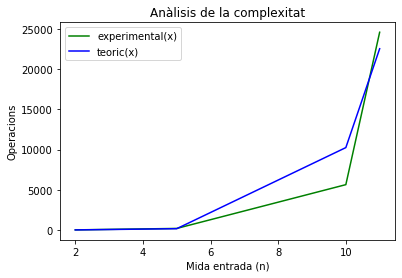

In [8]:

import matplotlib.pyplot as plt
import numpy as np



plt.plot(ln,steps_experimental, 'g',label='experimental(x)')
plt.plot(ln,steps_teoric, 'b',label='teoric(x)')
#plt.plot(ln,steps_log, 'r', label='f(x)=log(x)')
#plt.xscale('log')
plt.xlabel('Mida entrada (n)')
plt.ylabel('Operacions')
plt.title('Anàlisis de la complexitat')
plt.legend()
plt.show()